<a href="https://colab.research.google.com/github/duybluemind1988/Data-science/blob/master/Marketing_chap_10_Customer_segmentation_(expand_chap_5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install fastcluster

     |████████████████████████████████| 163kB 2.8MB/s 


In [60]:
# Load basic library
import re
import numpy as np
import time
import pandas as pd
from tensorflow import random
from sklearn.externals import joblib 
from scipy import stats

# import require packages for plotting
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
import plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import altair as alt # no need to add altviewer
from pandas.plotting import scatter_matrix


# Load Keras
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from keras.models import Sequential
from keras import backend as K

from keras.optimizers import Adam
from keras import regularizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from keras.regularizers import l1
from keras.regularizers import l2
from keras.regularizers import l1_l2
from keras.layers import Dropout
from keras.layers import Activation
from keras.layers import Dense
from keras.metrics import categorical_crossentropy


#Load sklearn
from sklearn import preprocessing as pp
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate,cross_val_predict
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.utils import shuffle

from sklearn.metrics import log_loss 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score,balanced_accuracy_score
from sklearn.metrics import average_precision_score 

from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA, NMF

#ML normal ML
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#ML ensembles
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

#

#Special
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier

#Load visual neural:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

# cluster
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import cluster, mixture
from sklearn.neighbors import kneighbors_graph
from itertools import cycle, islice

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import MeanShift
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import SpectralClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import OPTICS
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import Birch
from sklearn.mixture import GaussianMixture
from sklearn.mixture import BayesianGaussianMixture

import fastcluster
#import hdbscan
from scipy.cluster.hierarchy import dendrogram, cophenet, fcluster
from scipy.spatial.distance import pdist

# PCA
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import SparsePCA
from sklearn.decomposition import KernelPCA
from sklearn.decomposition import FastICA 
from sklearn.decomposition import FactorAnalysis
from sklearn.decomposition import MiniBatchDictionaryLearning #other
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import MDS
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE
from sklearn.random_projection import GaussianRandomProjection
from sklearn.random_projection import SparseRandomProjection

#imblearn library
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from collections import Counter

In [4]:
df=pd.read_excel('https://github.com/mrinmaisharma/Online-Retail-Dataset/blob/master/OnlineRetail.xlsx?raw=true',sep=';')
print(df.shape)
df.head()

(541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


Attribute Information:

- InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
- StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
- Description: Product (item) name. Nominal.
- Quantity: The quantities of each product (item) per transaction. Numeric.
- InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
- UnitPrice: Unit price. Numeric, Product price per unit in sterling.
- CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
- Country: Country name. Nominal, the name of the country where each customer resides.

# Data clean up

In [5]:
df = df.loc[df['Quantity'] > 0]
df = df[pd.notnull(df['CustomerID'])]

In [6]:
df = df.loc[df['InvoiceDate'] < '2011-12-01']

In [7]:
df['Sales'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [11]:
customer_df = df.groupby('CustomerID').agg({
    'Sales': sum,
    'InvoiceNo': lambda x: x.nunique()
})

customer_df.columns = ['TotalSales', 'OrderCount']
customer_df['AvgOrderValue'] = customer_df['TotalSales']/customer_df['OrderCount']
customer_df.head(15)

,TotalSales,OrderCount,AvgOrderValue
CustomerID,,,
12346.0,77183.60,1,77183.600000
12347.0,4085.18,6,680.863333
12348.0,1797.24,4,449.310000
12349.0,1757.55,1,1757.550000
12350.0,334.40,1,334.400000
12352.0,2506.04,8,313.255000
12353.0,89.00,1,89.000000
12354.0,1079.40,1,1079.400000
12355.0,459.40,1,459.400000


Now, as you can see from this data, the three columns, TotalSales, OrderCount, and
AvgOrderValue, have different scales. TotalSales can take any values from 0 to 26,848,
while OrderCount takes values between 1 and 201. Clustering algorithms are highly
affected by the scales of the data, so we need to normalize this data to be on the same scale.
We are going to take two steps to normalize this data. First, we are going to rank the data,
so that the values of each column range from 1 to 4298, which is the total number of
records. Take a look at the following code:

In [9]:

rank_df = customer_df.rank(method='first')
rank_df.head(15)
# rand value from index 1 to 4298 (lowest: 1, highest: 4298)

,TotalSales,OrderCount,AvgOrderValue
CustomerID,,,
12346.0,4290.0,1.0,4298.0
12347.0,3958.0,3470.0,3888.0
12348.0,3350.0,2861.0,3303.0
12349.0,3321.0,2.0,4238.0
12350.0,1241.0,3.0,2561.0
12352.0,3630.0,3774.0,2360.0
12353.0,119.0,4.0,201.0
12354.0,2781.0,5.0,4151.0
12355.0,1670.0,6.0,3354.0


In [12]:
normalized_df = (rank_df - rank_df.mean()) / rank_df.std()
normalized_df.head(15)
# Same with StandardScaler

,TotalSales,OrderCount,AvgOrderValue
CustomerID,,,
12346.0,1.724999,-1.731446,1.731446
12347.0,1.457445,1.064173,1.401033
12348.0,0.967466,0.573388,0.929590
12349.0,0.944096,-1.730641,1.683093
12350.0,-0.732148,-1.729835,0.331622
12352.0,1.193114,1.309162,0.169639
12353.0,-1.636352,-1.729029,-1.570269
12354.0,0.508917,-1.728223,1.612981
12355.0,-0.386422,-1.727417,0.970690


In [13]:
StandardScaler().fit_transform(rank_df) 

array([[ 1.72520003, -1.73164786,  1.73164786],
       [ 1.45761469,  1.06429649,  1.4011961 ],
       [ 0.9675789 ,  0.57345472,  0.92969784],
       ...,
       [-1.60510902, -0.49205074, -1.51806318],
       [ 1.00626593,  1.61075088, -1.32946388],
       [ 0.98611644,  0.57264874,  1.31173232]])

In [10]:
rank_df.describe()

,TotalSales,OrderCount,AvgOrderValue
count,4298.000000,4298.000000,4298.000000
mean,2149.500000,2149.500000,2149.500000
std,1240.870058,1240.870058,1240.870058
min,1.000000,1.000000,1.000000
25%,1075.250000,1075.250000,1075.250000
50%,2149.500000,2149.500000,2149.500000
75%,3223.750000,3223.750000,3223.750000
max,4298.000000,4298.000000,4298.000000


In [14]:
normalized_df.describe()

,TotalSales,OrderCount,AvgOrderValue
count,4.298000e+03,4.298000e+03,4.298000e+03
mean,9.952744e-17,-1.231371e-16,5.719018e-17
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.731446e+00,-1.731446e+00,-1.731446e+00
25%,-8.657232e-01,-8.657232e-01,-8.657232e-01
50%,0.000000e+00,0.000000e+00,0.000000e+00
75%,8.657232e-01,8.657232e-01,8.657232e-01
max,1.731446e+00,1.731446e+00,1.731446e+00


# Customer Segmentation via K-Means Clustering

In [27]:

for n_cluster in [4,5,6,7,8]:
    kmeans = KMeans(n_clusters=n_cluster).fit(
        normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']]
    )
    silhouette_avg = silhouette_score(
        normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']], 
        kmeans.labels_
    )
    
    print('Silhouette Score for %i Clusters: %0.4f' % (n_cluster, silhouette_avg))

Silhouette Score for 4 Clusters: 0.4117
Silhouette Score for 5 Clusters: 0.3783
Silhouette Score for 6 Clusters: 0.3778
Silhouette Score for 7 Clusters: 0.3912
Silhouette Score for 8 Clusters: 0.3810


In [20]:
kmeans = KMeans(n_clusters=4).fit(normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']])

In [21]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [22]:
kmeans.labels_

array([2, 1, 1, ..., 0, 3, 1], dtype=int32)

In [42]:
normalized_df.columns

Index(['TotalSales', 'OrderCount', 'AvgOrderValue'], dtype='object')

In [24]:
four_cluster_df = normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']].copy(deep=True)
four_cluster_df['Cluster'] = kmeans.labels_
four_cluster_df.head()

,TotalSales,OrderCount,AvgOrderValue,Cluster
CustomerID,,,,
12346.0,1.724999,-1.731446,1.731446,2
12347.0,1.457445,1.064173,1.401033,1
12348.0,0.967466,0.573388,0.929590,1
12349.0,0.944096,-1.730641,1.683093,2
12350.0,-0.732148,-1.729835,0.331622,2


In [23]:
kmeans.cluster_centers_

array([[-1.23169393, -0.78073571, -1.05471089],
       [ 1.20371018,  0.99681301,  0.87944557],
       [-0.13775005, -0.85149302,  0.79203409],
       [ 0.24889228,  0.74548572, -0.6405685 ]])

Let's take a closer look at this. The First cluster has the lowest numbers for all three
attributes. This suggests that the First cluster contains customers with the smallest
amount of sales, smallest number of orders, and lowest average per-order value. This group
of customers is one of low-value customers.

On the other hand, the second cluster has the
highest numbers for all three attributes. The customers in the second cluster have the greatest
amount of sales, greatest number of orders, and highest average per-order value. So, these
customers in the second cluster purchase expensive items and give the business the highest
revenue. You would typically want to focus your marketing efforts on this segment of
customers, as it will result in the highest return.

The customers in the fourth cluster are interesting. They make purchases relatively
frequently, as they have a medium-to-high cluster center value for OrderCount, but their
average per-order value is low, as the cluster center for AvgOrderValue is low. These are
the customers who make frequent purchases of low-value items. So, it would be perfect to
market items with low per-item prices to this segment of customers. The customers in the
first cluster are also interesting. Their contributions to the revenue and number of orders
are medium to low, looking at the centers of this cluster. However, their average per-order
value is high. These are the customers who buy expensive items infrequently. Thus, it
would be perfect to market expensive items to this segment of customers.

In [25]:
four_cluster_df.groupby('Cluster').count()['TotalSales']

Cluster
0    1172
1    1128
2    1064
3     934
Name: TotalSales, dtype: int64

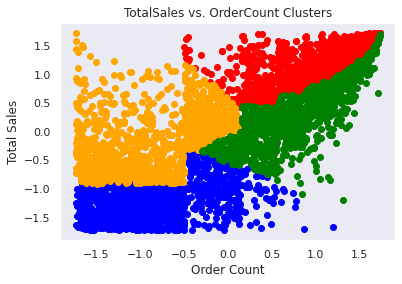

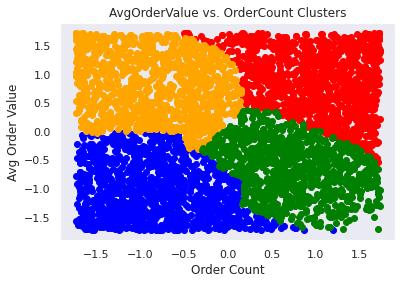

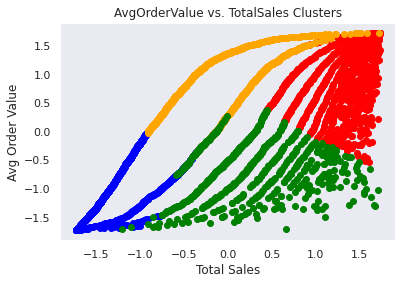

In [26]:
plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['TotalSales'],
    c='blue'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['TotalSales'],
    c='red'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['TotalSales'],
    c='orange'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['TotalSales'],
    c='green'
)

plt.title('TotalSales vs. OrderCount Clusters')
plt.xlabel('Order Count')
plt.ylabel('Total Sales')

plt.grid()
plt.show()


plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['AvgOrderValue'],
    c='blue'
)
plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['AvgOrderValue'],
    c='red'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['AvgOrderValue'],
    c='orange'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['AvgOrderValue'],
    c='green'
)

plt.title('AvgOrderValue vs. OrderCount Clusters')
plt.xlabel('Order Count')
plt.ylabel('Avg Order Value')

plt.grid()
plt.show()


plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['TotalSales'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['AvgOrderValue'],
    c='blue'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['TotalSales'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['AvgOrderValue'],
    c='red'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['TotalSales'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['AvgOrderValue'],
    c='orange'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['TotalSales'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['AvgOrderValue'],
    c='green'
)
plt.title('AvgOrderValue vs. TotalSales Clusters')
plt.xlabel('Total Sales')
plt.ylabel('Avg Order Value')

plt.grid()
plt.show()

The first plot shows the clusters visualized based on AvgOrderValue and OrderCount. On
the other hand, the second plot shows the clusters visualized based on
AvgOrderValue and TotalSales. As you can see from these plots, the cluster in blue has
the lowest average per-order value and the lowest number of orders. However, the cluster
in red has the highest average per-order value and the greatest number of orders.
Visualizing clusters helps you understand the characteristics of different clusters much
more easily and clearly.

- Interpreting Customer Segments

In [32]:
pd.DataFrame(
    df.loc[
        df['CustomerID'].isin(
            four_cluster_df.loc[four_cluster_df['Cluster'] == 3].index
        )
    ].groupby('Description').count()[
        'StockCode'
    ].sort_values(ascending=False).head()
)

,StockCode
Description,
WHITE HANGING HEART T-LIGHT HOLDER,621
REX CASH+CARRY JUMBO SHOPPER,435
REGENCY CAKESTAND 3 TIER,319
ASSORTED COLOUR BIRD ORNAMENT,316
PARTY BUNTING,311


In [40]:
customer_df.loc[four_cluster_df.loc[four_cluster_df['Cluster'] == 3].index].describe()

,TotalSales,OrderCount,AvgOrderValue
count,934.000000,934.000000,934.000000
mean,1078.887625,5.603854,207.236129
std,1375.890124,8.684010,57.658834
min,201.120000,2.000000,28.731429
25%,570.212500,3.000000,165.639167
50%,817.295000,4.000000,208.329000
75%,1197.675000,6.000000,246.315813
max,32649.460000,201.000000,339.920000


In [33]:
pd.DataFrame(
    df.loc[
        df['CustomerID'].isin(
            four_cluster_df.loc[four_cluster_df['Cluster'] == 1].index
        )
    ].groupby('Description').count()[
        'StockCode'
    ].sort_values(ascending=False).head()
)

,StockCode
Description,
JUMBO BAG RED RETROSPOT,1129
REGENCY CAKESTAND 3 TIER,1077
WHITE HANGING HEART T-LIGHT HOLDER,1062
LUNCH BAG RED RETROSPOT,923
PARTY BUNTING,859


For this high-value segment, the best-selling item was JUMBO BAG RED RETROSPOT and
the second best-selling item was REGENCY CAKESTAND 3 TIER. You can utilize this
information in marketing strategies, when you target this customer segment. In your
marketing campaigns, you can recommend items similar to these best-selling items to this
segment of customers, as they are the most interested in these types of items.

In [41]:
customer_df.loc[four_cluster_df.loc[four_cluster_df['Cluster'] == 1].index].describe()

,TotalSales,OrderCount,AvgOrderValue
count,1128.000000,1128.000000,1128.000000
mean,5632.916162,8.455674,619.605341
std,15505.418274,10.531896,767.960400
min,1000.160000,1.000000,215.450606
25%,1766.125000,4.000000,357.664500
50%,2735.915000,6.000000,444.150833
75%,4487.962500,10.000000,620.571148
max,268478.000000,192.000000,14844.766667


# Other clustering method DNN

Function plot scatter cluster

In [ ]:
def plot_cluster(name_cluster):
  
  plt.scatter(
      four_cluster_df.loc[four_cluster_df[name_cluster] == 0]['OrderCount'], 
      four_cluster_df.loc[four_cluster_df[name_cluster] == 0]['TotalSales'],
      c='blue'
  )

  plt.scatter(
      four_cluster_df.loc[four_cluster_df[name_cluster] == 1]['OrderCount'], 
      four_cluster_df.loc[four_cluster_df[name_cluster] == 1]['TotalSales'],
      c='red'
  )

  plt.scatter(
      four_cluster_df.loc[four_cluster_df[name_cluster] == 2]['OrderCount'], 
      four_cluster_df.loc[four_cluster_df[name_cluster] == 2]['TotalSales'],
      c='orange'
  )

  plt.scatter(
      four_cluster_df.loc[four_cluster_df[name_cluster] == 3]['OrderCount'], 
      four_cluster_df.loc[four_cluster_df[name_cluster] == 3]['TotalSales'],
      c='green'
  )

  plt.title('TotalSales vs. OrderCount Clusters')
  plt.xlabel('Order Count')
  plt.ylabel('Total Sales')

  plt.grid()
  plt.show()


  plt.scatter(
      four_cluster_df.loc[four_cluster_df[name_cluster] == 0]['OrderCount'], 
      four_cluster_df.loc[four_cluster_df[name_cluster] == 0]['AvgOrderValue'],
      c='blue'
  )
  plt.scatter(
      four_cluster_df.loc[four_cluster_df[name_cluster] == 1]['OrderCount'], 
      four_cluster_df.loc[four_cluster_df[name_cluster] == 1]['AvgOrderValue'],
      c='red'
  )

  plt.scatter(
      four_cluster_df.loc[four_cluster_df[name_cluster] == 2]['OrderCount'], 
      four_cluster_df.loc[four_cluster_df[name_cluster] == 2]['AvgOrderValue'],
      c='orange'
  )

  plt.scatter(
      four_cluster_df.loc[four_cluster_df[name_cluster] == 3]['OrderCount'], 
      four_cluster_df.loc[four_cluster_df[name_cluster] == 3]['AvgOrderValue'],
      c='green'
  )

  plt.title('AvgOrderValue vs. OrderCount Clusters')
  plt.xlabel('Order Count')
  plt.ylabel('Avg Order Value')

  plt.grid()
  plt.show()


  plt.scatter(
      four_cluster_df.loc[four_cluster_df[name_cluster] == 0]['TotalSales'], 
      four_cluster_df.loc[four_cluster_df[name_cluster] == 0]['AvgOrderValue'],
      c='blue'
  )

  plt.scatter(
      four_cluster_df.loc[four_cluster_df[name_cluster] == 1]['TotalSales'], 
      four_cluster_df.loc[four_cluster_df[name_cluster] == 1]['AvgOrderValue'],
      c='red'
  )

  plt.scatter(
      four_cluster_df.loc[four_cluster_df[name_cluster] == 2]['TotalSales'], 
      four_cluster_df.loc[four_cluster_df[name_cluster] == 2]['AvgOrderValue'],
      c='orange'
  )

  plt.scatter(
      four_cluster_df.loc[four_cluster_df[name_cluster] == 3]['TotalSales'], 
      four_cluster_df.loc[four_cluster_df[name_cluster] == 3]['AvgOrderValue'],
      c='green'
  )
  plt.title('AvgOrderValue vs. TotalSales Clusters')
  plt.xlabel('Total Sales')
  plt.ylabel('Avg Order Value')

  plt.grid()
  plt.show()

In [43]:
normalized_df

,TotalSales,OrderCount,AvgOrderValue
CustomerID,,,
12346.0,1.724999,-1.731446,1.731446
12347.0,1.457445,1.064173,1.401033
12348.0,0.967466,0.573388,0.929590
12349.0,0.944096,-1.730641,1.683093
12350.0,-0.732148,-1.729835,0.331622
...,...,...,...
18280.0,-1.272091,-0.493605,-0.850613
18281.0,-1.648440,-0.492799,-1.596058
18282.0,-1.604922,-0.491993,-1.517887


## Hierarchical clustering

In [44]:
Z = fastcluster.linkage_vector(normalized_df, \
                               method='ward', metric='euclidean')
Z_dataFrame = pd.DataFrame(data=Z, \
    columns=['clusterOne','clusterTwo','distance','newClusterSize'])
Z_dataFrame

,clusterOne,clusterTwo,distance,newClusterSize
0,914.0,1043.0,0.001974,2.0
1,403.0,457.0,0.001974,2.0
2,768.0,785.0,0.001974,2.0
3,754.0,755.0,0.001974,2.0
4,3383.0,3395.0,0.002418,2.0
...,...,...,...,...
4292,8578.0,8584.0,29.940188,1090.0
4293,8585.0,8588.0,37.331600,1566.0
4294,8589.0,8590.0,47.081963,2016.0
4295,8587.0,8591.0,67.276476,2282.0


In [45]:
Z_dataFrame.describe()

,clusterOne,clusterTwo,distance,newClusterSize
count,4297.000000,4297.000000,4297.000000,4297.000000
mean,3725.487317,4867.512683,0.304585,12.614848
std,2494.412527,2331.947944,2.430762,93.502360
min,0.000000,35.000000,0.001974,2.000000
25%,1587.000000,3070.000000,0.028866,2.000000
50%,3331.000000,5111.000000,0.056722,3.000000
75%,5860.000000,6816.000000,0.134054,6.000000
max,8592.000000,8593.000000,109.598313,4298.000000


In [73]:
distance_threshold = 45
clusters = fcluster(Z, distance_threshold, criterion='distance')
X_train_hierClustered = clusters
print("Number of distinct clusters: ", \
      len(set(X_train_hierClustered)))

Number of distinct clusters:  4


In [74]:
four_cluster_df['Cluster_Hierarchical'] = X_train_hierClustered
four_cluster_df.head()

,TotalSales,OrderCount,AvgOrderValue,Cluster,Cluster_Hierarchical
CustomerID,,,,,
12346.0,1.724999,-1.731446,1.731446,2,3
12347.0,1.457445,1.064173,1.401033,1,4
12348.0,0.967466,0.573388,0.929590,1,4
12349.0,0.944096,-1.730641,1.683093,2,3
12350.0,-0.732148,-1.729835,0.331622,2,2


In [75]:
four_cluster_df['Cluster_Hierarchical']=LabelEncoder().fit_transform(four_cluster_df['Cluster_Hierarchical'])

In [76]:
four_cluster_df.groupby('Cluster').count()['TotalSales']

Cluster
0    1172
1    1128
2    1064
3     934
Name: TotalSales, dtype: int64

In [77]:
four_cluster_df.groupby('Cluster_Hierarchical').count()['TotalSales']

Cluster_Hierarchical
0     926
1    1090
2     716
3    1566
Name: TotalSales, dtype: int64

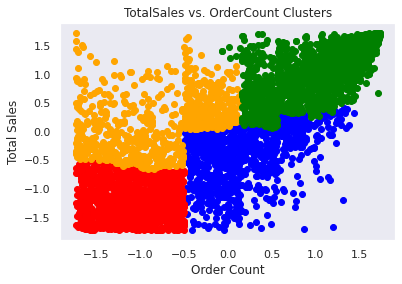

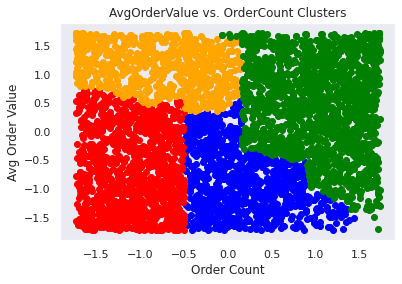

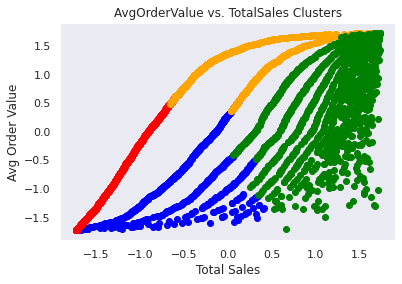

In [78]:
plot_cluster('Cluster_Hierarchical')

## GMM

In [117]:
gms_per_k =[]
for k in range(2, 8):
  print(k)
  t1=time.time()
  temp=GaussianMixture(n_components=k, n_init=10, random_state=42).fit(normalized_df)
  gms_per_k.append(temp)
  t2=time.time()
  print(t2-t1)

2
0.5185546875
3
0.5605332851409912
4
1.073678970336914
5
1.4055747985839844
6
1.3253157138824463
7
1.6469526290893555


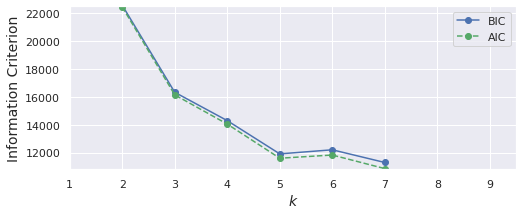

In [119]:
bics = [model.bic(normalized_df) for model in gms_per_k]
aics = [model.aic(normalized_df) for model in gms_per_k]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 8),bics, "bo-", label="BIC")
plt.plot(range(2, 8),aics, "go--", label="AIC")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Information Criterion", fontsize=14)
plt.axis([1, 9.5, np.min(aics) - 50, np.max(aics) + 50])
plt.legend()
#save_fig("aic_bic_vs_k_plot")
plt.show()

In [121]:
X_GMM=GaussianMixture(n_components=4, n_init=10, random_state=42).fit_predict(normalized_df)
print("Number of distinct clusters: ", \
      len(set(X_GMM)))

four_cluster_df['Cluster_GMM'] = X_GMM
four_cluster_df.groupby('Cluster_GMM').count()['TotalSales']

Number of distinct clusters:  4


Cluster_GMM
0    1320
1    1243
2    1201
3     534
Name: TotalSales, dtype: int64

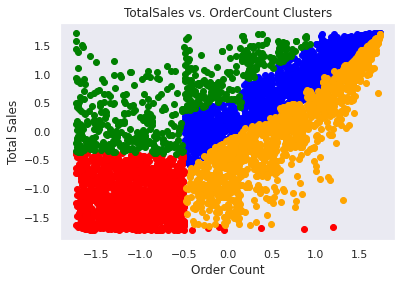

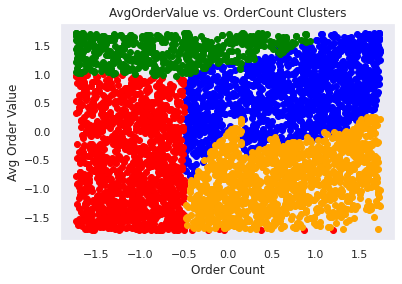

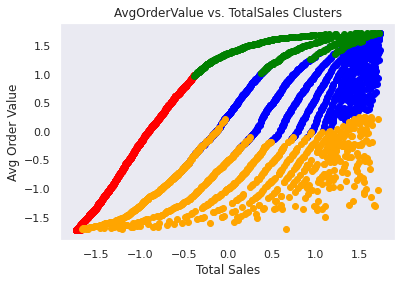

In [122]:
plot_cluster('Cluster_GMM')

## DBSCAN

In [81]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(normalized_df)
distances, indices = nbrs.kneighbors(normalized_df)
distances = np.sort(distances, axis=0)

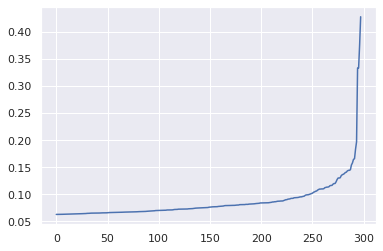

In [85]:
distances = distances[4000:,1]
plt.plot(distances)

In [106]:
eps = 0.13
min_samples = 5
leaf_size = 30
n_jobs = 4

db = DBSCAN(eps=eps, 
            min_samples=min_samples, 
            leaf_size=leaf_size, 
            n_jobs=n_jobs
            )


X_train_PCA_dbscanClustered = db.fit_predict(normalized_df)

print("Number of distinct clusters: ", \
      len(set(X_train_PCA_dbscanClustered)))

Number of distinct clusters:  13


In [107]:
four_cluster_df['Cluster_DBSCAN'] = X_train_PCA_dbscanClustered
four_cluster_df.groupby('Cluster_DBSCAN').count()['TotalSales']

Cluster_DBSCAN
-1       77
 0     1856
 1     2288
 2        5
 3       11
 4       22
 5        5
 6        6
 7        5
 8        7
 9        6
 10       5
 11       5
Name: TotalSales, dtype: int64

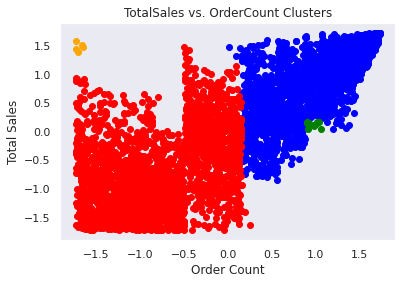

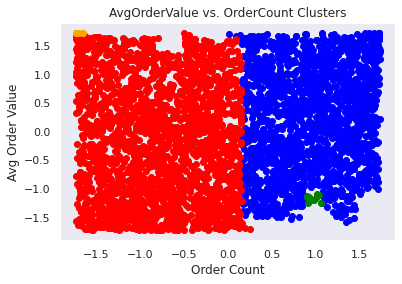

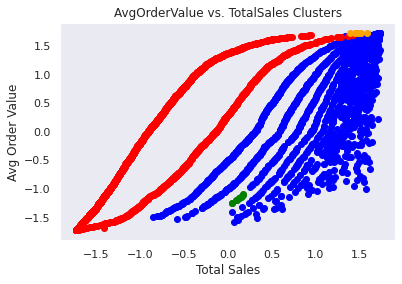

In [108]:
plot_cluster('Cluster_DBSCAN')

## HDBSCAN

In [109]:
!pip install hdbscan
import hdbscan

     |████████████████████████████████| 4.7MB 2.8MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.26-cp36-cp36m-linux_x86_64.whl size=2307220 sha256=51caa81582a473995c5b812d8adad72ed80a309e61e0fe6ddb66cff62aaa871a
  Stored in directory: /root/.cache/pip/wheels/82/38/41/372f034d8abd271ef7787a681e0a47fc05d472683a7eb088ed
Successfully built hdbscan


In [113]:
min_cluster_size = 30
min_samples = None
alpha = 1.0
cluster_selection_method = 'eom'

hdb = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size, \
        min_samples=min_samples, alpha=alpha, \
        cluster_selection_method=cluster_selection_method)

X_train_PCA_hdbscanClustered = hdb.fit_predict(normalized_df)
print("Number of distinct clusters: ", \
      len(set(X_train_PCA_hdbscanClustered)))

Number of distinct clusters:  4


In [114]:
four_cluster_df['Cluster_HDBSCAN'] = X_train_PCA_hdbscanClustered
four_cluster_df.groupby('Cluster_HDBSCAN').count()['TotalSales']

Cluster_HDBSCAN
-1     390
 0    1790
 1     721
 2    1397
Name: TotalSales, dtype: int64

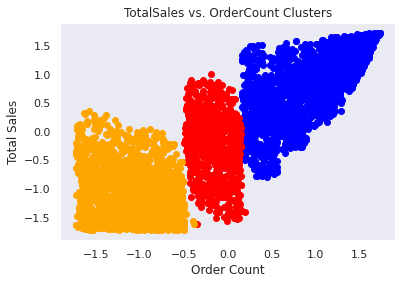

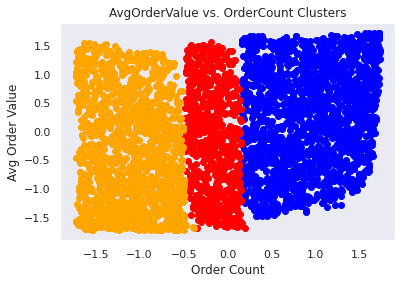

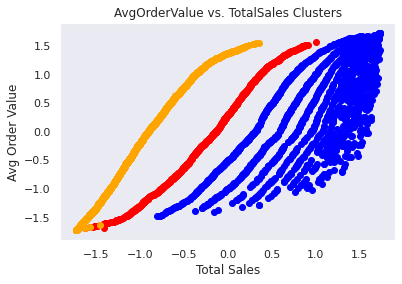

In [115]:
plot_cluster('Cluster_HDBSCAN')

## Compare all method

MiniBatchKMeans (D)
Number cluster:  4
{0, 1, 2, 3}


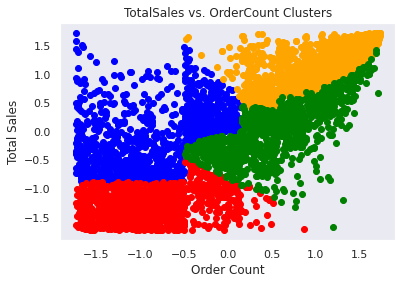

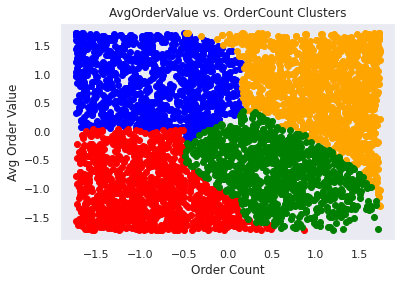

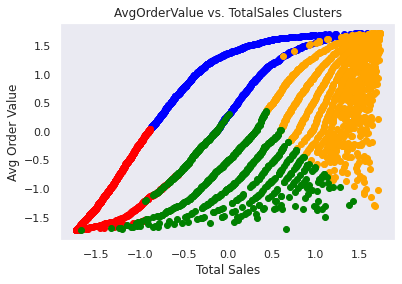

AffinityPropagation
Number cluster:  8
{0, 1, 2, 3, 4, 5, 6, 7}


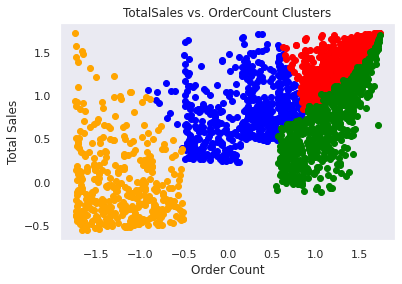

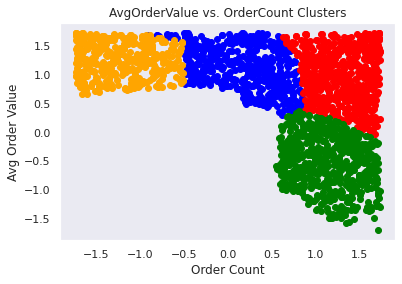

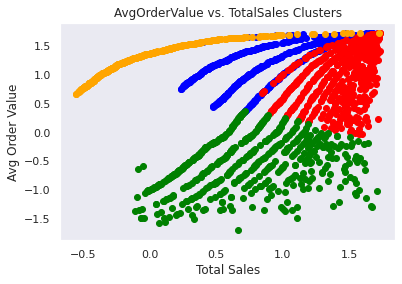

MeanShift
Number cluster:  2
{0, 1}


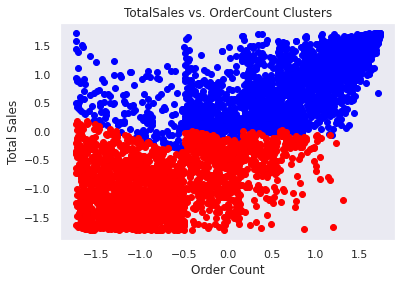

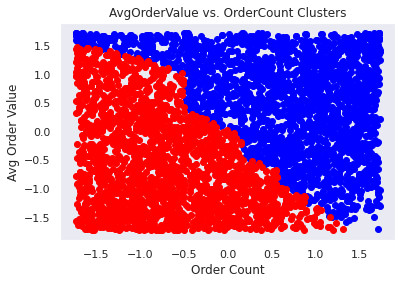

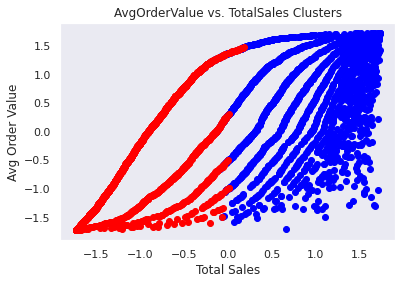

SpectralClustering (D)
Number cluster:  4
{0, 1, 2, 3}


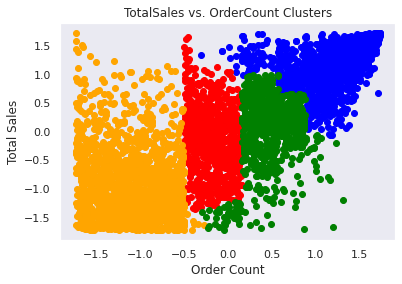

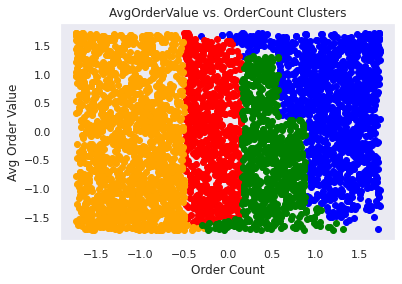

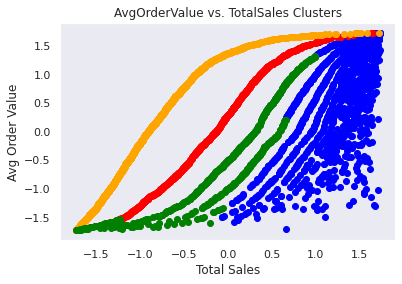

Agglomerative-ward (D)
Number cluster:  4
{0, 1, 2, 3}


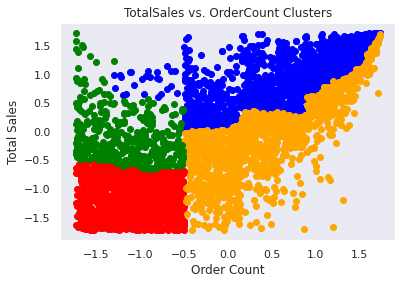

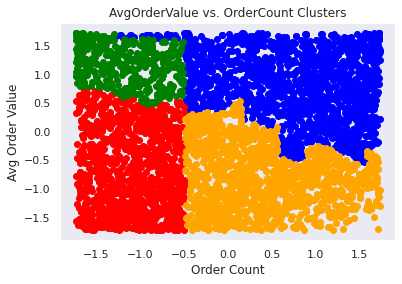

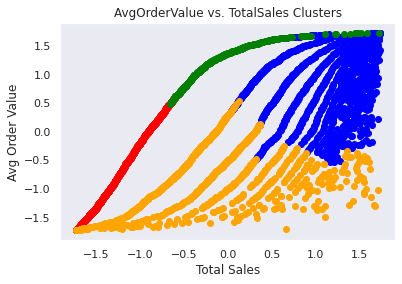

Agglomerative-average_linkage (D)
Number cluster:  4
{0, 1, 2, 3}


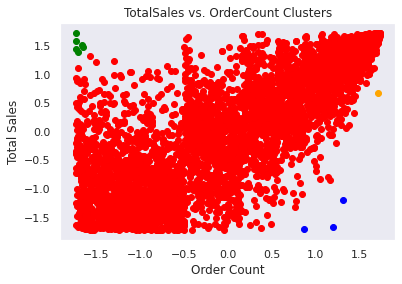

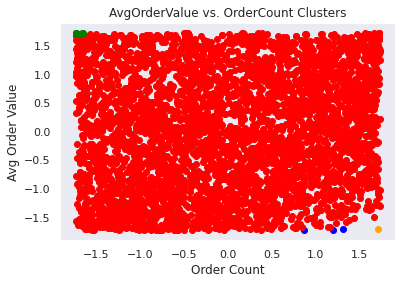

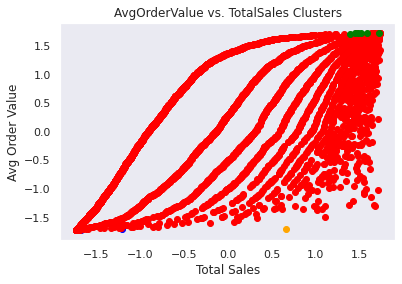

DBSCAN
Number cluster:  2
{0, -1}


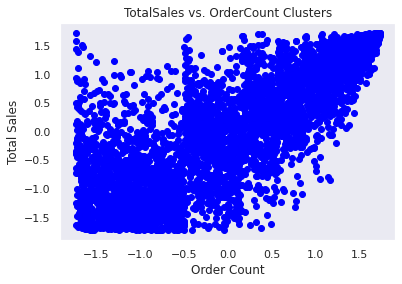

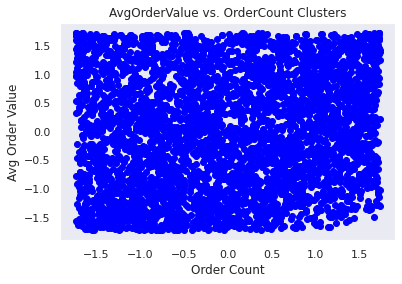

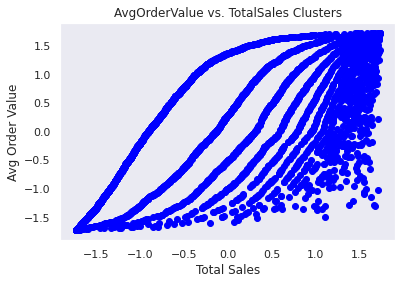

OPTICS
Number cluster:  2
{0, -1}


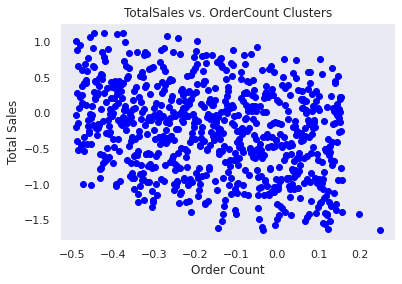

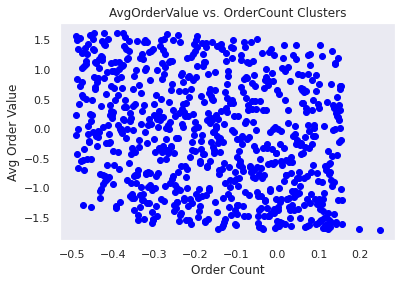

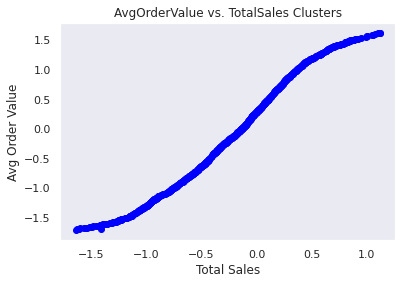

Birch (D)
Number cluster:  4
{0, 1, 2, 3}


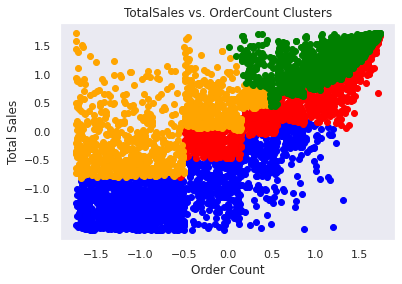

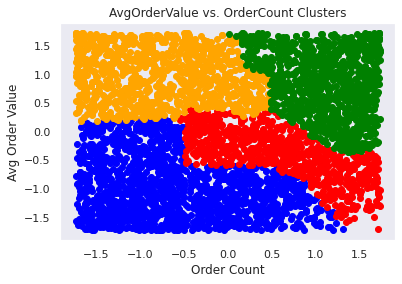

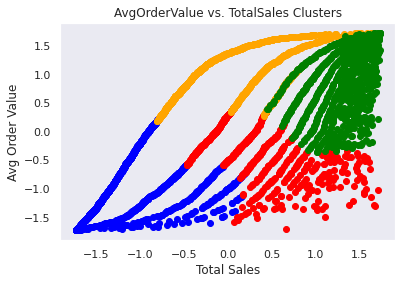

GaussianMixture (D)
Number cluster:  4
{0, 1, 2, 3}


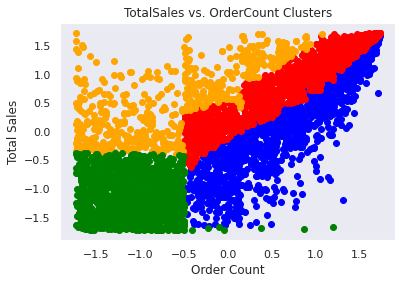

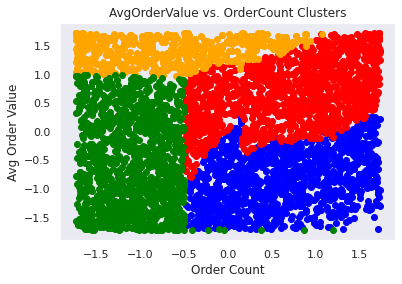

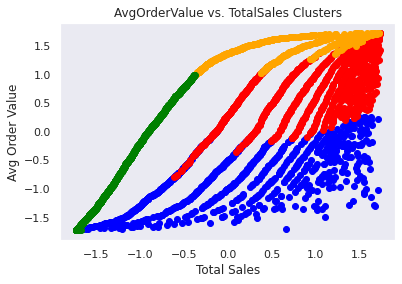

In [123]:
import time
import warnings
from sklearn import cluster, mixture

X=normalized_df.copy()
time_=[]
name_=[]
num_cluster=[]
# Default setting for clustering algorithm:
default_base = {'quantile': .3,     # Meanshift bandwith
                'eps': .3,          # Dbscan
                'damping': .9,      # Affinity_propagation 
                'preference': -200, # Affinity_propagation 
                'n_neighbors': 10,  # Agglomerative, average_linkage 
                'n_clusters': 4, # Two_means, Agglomerative, Spectral, Average_linkage, Birch, GaussianMixture
                'min_samples': 20,  # Optics
                'xi': 0.05,         # Optics 
                'min_cluster_size': 0.1 # Optics
                }

# update parameters with dataset-specific values
params = default_base.copy()

# estimate bandwidth for mean shift
bandwidth = cluster.estimate_bandwidth(X, quantile=params['quantile']) # Mean shift

# connectivity matrix for structured Ward
connectivity = kneighbors_graph(
    X, n_neighbors=params['n_neighbors'], include_self=False)
# make connectivity symmetric
connectivity = 0.5 * (connectivity + connectivity.T)

# ============
# Create cluster objects
# ============
ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)

two_means = cluster.MiniBatchKMeans(n_clusters=params['n_clusters'])

ward = cluster.AgglomerativeClustering(
    n_clusters=params['n_clusters'], linkage='ward',
    connectivity=connectivity)

average_linkage = cluster.AgglomerativeClustering(
    linkage="average", affinity="cityblock",
    n_clusters=params['n_clusters'], connectivity=connectivity)

spectral = cluster.SpectralClustering(
    n_clusters=params['n_clusters'], eigen_solver='arpack',
    affinity="nearest_neighbors")

dbscan = cluster.DBSCAN(eps=params['eps'])

optics = cluster.OPTICS(min_samples=params['min_samples'],
                        xi=params['xi'],
                        min_cluster_size=params['min_cluster_size'])

affinity_propagation = cluster.AffinityPropagation(
    damping=params['damping'], preference=params['preference'])

birch = cluster.Birch(n_clusters=params['n_clusters'])

gmm = mixture.GaussianMixture(
    n_components=params['n_clusters'], covariance_type='full')

clustering_algorithms = (
    ('MiniBatchKMeans (D)', two_means),
    ('AffinityPropagation', affinity_propagation),
    ('MeanShift', ms),
    ('SpectralClustering (D)', spectral),
    ('Agglomerative-ward (D)', ward),
    ('Agglomerative-average_linkage (D)', average_linkage),
    ('DBSCAN', dbscan),
    ('OPTICS', optics),
    ('Birch (D)', birch),
    ('GaussianMixture (D)', gmm)
)

for name, algorithm in clustering_algorithms:
    t0 = time.time()
    print(name)
    name_.append(name)
    # catch warnings related to kneighbors_graph
    with warnings.catch_warnings():
        warnings.filterwarnings(
            "ignore",
            message="the number of connected components of the " +
            "connectivity matrix is [0-9]{1,2}" +
            " > 1. Completing it to avoid stopping the tree early.",
            category=UserWarning)
        warnings.filterwarnings(
            "ignore",
            message="Graph is not fully connected, spectral embedding" +
            " may not work as expected.",
            category=UserWarning)
        algorithm.fit(X)

    t1 = time.time()
    if hasattr(algorithm, 'labels_'):
        y_pred = algorithm.labels_.astype(np.int)
    else:
        y_pred = algorithm.predict(X)

    
    #---------------DNN add-----------------------

    clusters_number=len(set(y_pred))
    print('Number cluster: ',clusters_number)
    print(set(y_pred))
    num_cluster.append(clusters_number)

    four_cluster_df['Cluster__'+name] = y_pred
    print(four_cluster_df.groupby('Cluster__'+name).count()['TotalSales'])
    plot_cluster('Cluster__'+name)


    time_.append(t1-t0)
    plt.show()



In [ ]:
pd.DataFrame(zip(name_,num_cluster,time_),columns=['Algorithm cluster','Num_cluster','Time']).sort_values(by='Time',ascending='False')